## Try 10.4.1: DBSCAN in Python.

**When the units and ranges of the features are different, standardizing the data is necessary. Data can be standardized using the StandardScaler library from the sklearn.preprocessing package.**

**The Python code below uses DBSCAN clustering to model homes based on sales price and square footage.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**
* **Change the value of eps. Observe the changes in the clusters and number of outliers identified.**
* **Change the value of min_samples. Observe the changes in the clusters and number of outliers identified.**

In [1]:
# Import packages and functions
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler

In [3]:
# Load the dataset
homes = pd.read_csv('homes.csv')

homes

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
0,1,388.0,2.180,4,3.0,4,12.0,1940,-3.0,9.00,0,Sold,0,Edison,1,0,0,0,0
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
2,3,386.0,2.112,5,2.0,4,8.0,1955,-1.5,2.25,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
4,5,155.5,1.800,1,2.0,4,8.0,1994,2.4,5.76,1,Sold,0,Adams,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,72,249.9,2.081,5,2.1,4,8.4,1970,0.0,0.00,1,Sold,0,Harris,0,1,0,0,0
72,73,215.0,2.044,1,1.1,4,4.4,1936,-3.4,11.56,0,Sold,0,Parker,0,0,0,0,1
73,74,435.0,2.253,11,2.0,3,6.0,1979,0.9,0.81,2,Sold,0,Redwood,0,0,0,0,0
74,75,274.9,1.861,4,2.0,4,8.0,1995,2.5,6.25,2,Active,1,Parker,0,0,0,0,1


In [4]:
# Create a smaller data frame with two variables: Price and Floor
homes_pf = homes[['Price', 'Floor']]
homes_pf.describe()

,Price,Floor
count,76.000000,76.000000
mean,285.796053,1.970395
std,60.333216,0.212420
min,155.500000,1.440000
25%,242.750000,1.860750
50%,276.000000,1.966500
75%,336.750000,2.107500
max,450.000000,2.896000


In [5]:
# Define a scaler to transform values
scaler = StandardScaler()

# Apply scaler and view result
homes_scaled = pd.DataFrame(scaler.fit_transform(homes_pf), columns=['Price', 'Floor'])
homes_scaled.describe()

,Price,Floor
count,7.600000e+01,7.600000e+01
mean,-2.220446e-16,-1.297208e-15
std,1.006645e+00,1.006645e+00
min,-2.173957e+00,-2.513507e+00
25%,-7.182126e-01,-5.195994e-01
50%,-1.634447e-01,-1.845691e-02
75%,8.501538e-01,6.497330e-01
max,2.739702e+00,4.386384e+00


In [6]:
# Initialize DBSCAN model
# Setting a large epsilon will cluster all "middle" values and detect outliers
dbscanModel = DBSCAN(eps=1, min_samples=12)

# Fit the model
dbscanModel = dbscanModel.fit(homes_scaled)

In [7]:
# Predict clusters
clusters = dbscanModel.fit_predict(homes_scaled)
clusters = pd.Categorical(clusters)
clusters

[0, -1, 0, -1, 0, ..., 0, 0, 0, 0, -1]
Length: 76
Categories (2, int64): [-1, 0]

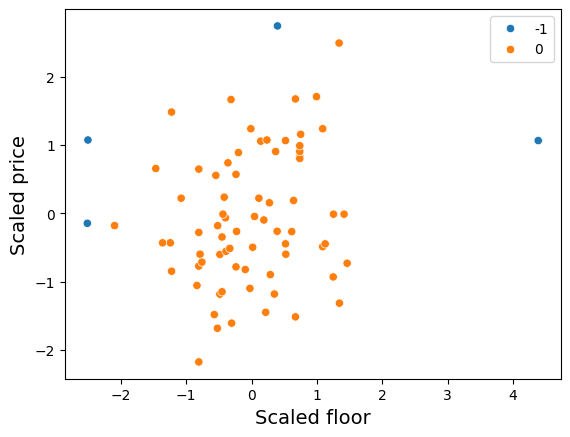

In [8]:
# Visualize scaled outliers
p = sns.scatterplot(data=homes_scaled, x='Floor', y='Price', hue=clusters)
p.set_xlabel('Scaled floor', fontsize=14);
p.set_ylabel('Scaled price', fontsize=14);

In [9]:
# Points where the prediction is -1 are considered outliers
outliers_scaled = homes_scaled[clusters == -1]
outliers_scaled

,Price,Floor
1,2.739702,0.396200
3,1.071227,-2.504029
19,-0.146760,-2.513507
75,1.062884,4.386384


In [10]:
# Outliers on original scale (price and square footage in thousands)
outliers_unscaled = homes[clusters == -1]
outliers_unscaled

,ID,Price,Floor,Lot,Bath,Bed,BathBed,Year,Age,AgeSq,Gar,Status,DAc,School,DEd,DHa,DAd,DCr,DPa
1,2,450.0,2.054,5,3.0,4,12.0,1957,-1.3,1.69,2,Sold,0,Edison,1,0,0,0,0
3,4,350.0,1.442,6,1.0,2,2.0,1956,-1.4,1.96,1,Active,1,Adams,0,0,1,0,0
19,20,277.0,1.440,3,2.0,3,6.0,1948,-2.2,4.84,2,Active,1,Edison,1,0,0,0,0
75,76,349.5,2.896,4,3.0,5,15.0,1979,0.9,0.81,2,Active,1,Crest,0,0,0,1,0


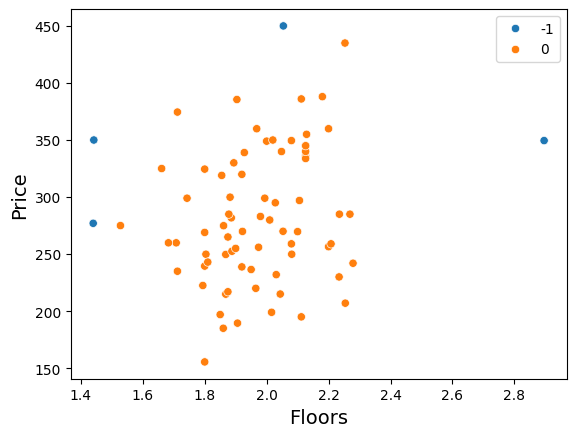

In [11]:
# Visualize outliers on original scale
p = sns.scatterplot(data=homes, x='Floor', y='Price', hue=clusters)
p.set_xlabel('Floors', fontsize=14);
p.set_ylabel('Price', fontsize=14);

## challenge activity 10.4.2: Clustering with DBSCAN using scikit-learn.

## 1)**Researchers studying chemical properties of wines collected data on a sample of white wines in Northern Portugal. A research goal was to cluster wines based on similar chemical properties.**

* **Fit the DBSCAN model to cluster wines.**

**The code provided creates a dataframe with two features (alcohol and total_sulfur_dioxide), normalizes the dataframe, initializes the DBSCAN model, and prints the cluster labels for each point in the dataset.**

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

wine = pd.read_csv('wine1.csv')

# Create an input matrix with selected features
X = wine[['alcohol', 'total_sulfur_dioxide']]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

# Cluster using DBSCAN with default options
dbModel = DBSCAN()

# Your code goes here

print(dbModel.labels_)

## 2) **Researchers studying chemical properties of wines collected data on a sample of white wines in Northern Portugal. A research goal was to cluster wines based on similar chemical properties.**

* **Use the DBSCAN clustering function to cluster wines. Keep eps and min_samples at default values.**

* **Fit the DBSCAN model to cluster wines.**

**The code provided creates a dataframe with two features (chlorides and fixed_acidity), normalizes the dataframe, and prints the cluster labels for each point in the dataset.**

In [ ]:


# Create an input matrix with selected features
X = wine[['chlorides', 'fixed_acidity']]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

# Your code goes here

print(dbModel.labels_)

## 3) Researchers studying chemical properties of wines collected data on a sample of white wines in Northern Portugal. A research goal was to cluster wines based on similar chemical properties.**

* **Use the DBSCAN clustering function to cluster wines. Set eps=0.98 and min_samples=3.**

* **Fit the DBSCAN model to cluster wines.**

**The code provided creates a dataframe with two features (sulphates and citric_acid), normalizes the dataframe, and prints the cluster labels for each point in the dataset.**

In [ ]:



# Create an input matrix with selected features
X = wine[['sulphates', 'citric_acid']]

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

# Your code goes here

print(dbModel.labels_)

## Solutions:

**(1)** dbModel = dbModel.fit(X)

**(2)** dbModel = DBSCAN()

    dbModel = dbModel.fit(X)

**(3)** dbModel = DBSCAN(eps=0.98, min_samples=3)

    dbModel = dbModel.fit(X)